## DFO Bottle Data Inventory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import datetime as dt
import glob
import gsw
import matplotlib.dates as mdates
import matplotlib as mpl

%matplotlib inline

In [2]:
df1=et.loadDFO()

In [3]:
df1['YD']=et.datetimeToYD(df1['dtUTC'])
df1['Year']=[int(i) for i in df1['Year']]

In [4]:
df1.keys()

Index(['Year', 'Month', 'Day', 'Hour', 'Lat', 'Lon', 'Pressure', 'Depth',
       'Ammonium', 'Ammonium_units', 'Chlorophyll_Extracted',
       'Chlorophyll_Extracted_units', 'N', 'Si', 'Silicate_units', 'AbsSal',
       'ConsT', 'Z', 'dtUTC', 'YD'],
      dtype='object')

In [5]:
dJDF=df1.loc[((df1.Lon<-123.6)&(df1.Lon>=-124.5)&(df1.Lat<48.6)&(df1.Lat>48))|\
             ((df1.Lon<-123.3)&(df1.Lon>=-123.6)&(df1.Lat<48.3)&(df1.Lat>48))]

### Region Definition

/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:123: UserWarning: No contour levels were found within the data range.
  contour_lines = axes.contour(


1.1363636363636362

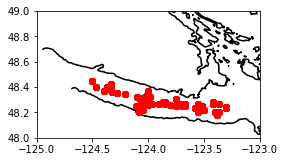

In [6]:
fig,ax=plt.subplots(1,1,figsize=(4,6))
grid = nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.plot(dJDF.Lon,dJDF.Lat,'ro',)
ax.set_xlim(-125,-123)
ax.set_ylim(48,49)
viz_tools.set_aspect(ax,coords='map')

### Available Chlorophyll data

/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:123: UserWarning: No contour levels were found within the data range.
  contour_lines = axes.contour(


Text(0, 0.5, 'Number of \nMeasurements')

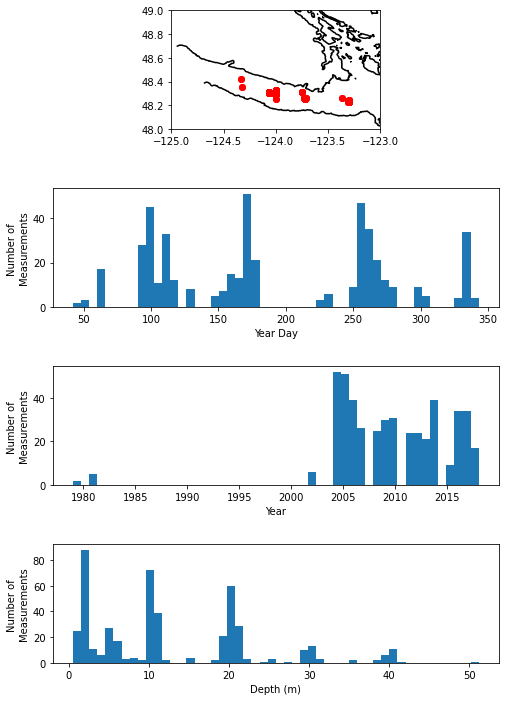

In [7]:
dfi=dJDF.loc[dJDF.Chlorophyll_Extracted>=0]
fig,ax=plt.subplots(4,1,figsize=(8,12))
fig.subplots_adjust(hspace=0.5)
ax=ax.flatten()
viz_tools.plot_coastline(ax[0], grid, coords = 'map')
ax[0].plot(dfi.Lon,dfi.Lat,'ro',)
ax[0].set_xlim(-125,-123)
ax[0].set_ylim(48,49)
viz_tools.set_aspect(ax[0],coords='map')
ax[1].hist(dfi.YD,50)
ax[1].set_xlabel('Year Day')
ax[1].set_ylabel('Number of \nMeasurements')
ax[2].hist(dfi.Year,50)
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Number of \nMeasurements')
ax[3].hist(dfi.Z,50)
ax[3].set_xlabel('Depth (m)')
ax[3].set_ylabel('Number of \nMeasurements')

Text(0.5, 1.0, 'All SJDF Chlorophyll Data')

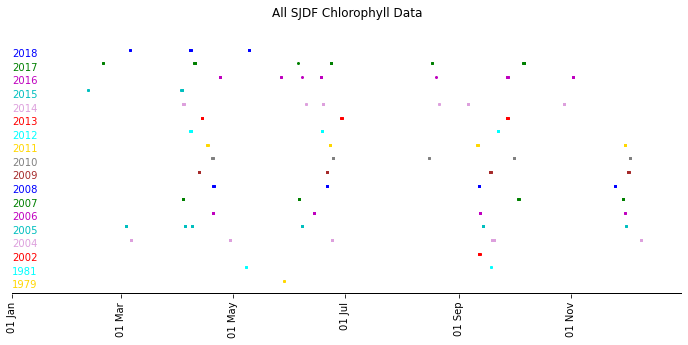

In [8]:
# plot matched data sampling times
yr0=int(1970)
clist=('gold','aqua','r','plum','c','m','g','b','brown','gray',
       'gold','aqua','r','plum','c','m','g','b','brown','gray')
fig,axL=plt.subplots(1,1,figsize=(12,5))
for ii, yr in enumerate(np.unique(dfi.Year)):
    datyr=dfi.loc[dfi.Year==yr]
    dshift=dt.datetime(yr0,1,1)-dt.datetime(yr,1,1)
    axL.plot(datyr.dtUTC+dshift,np.zeros(np.shape(datyr.dtUTC))+.1*ii,'.',
             color=clist[ii],markersize=4,label=str(yr))
    axL.annotate(str(yr), xy=(dt.datetime(yr0,1,1), 0.1*ii-.05),color=clist[ii])
axL.set_yticks(());
yearsFmt = mdates.DateFormatter('%d %b')
axL.xaxis.set_major_formatter(yearsFmt)
axL.xaxis.set_ticks([dt.datetime(yr0,1,1), dt.datetime(yr0,3,1),dt.datetime(yr0,5,1),dt.datetime(yr0,7,1),
                     dt.datetime(yr0,9,1),dt.datetime(yr0,11,1),dt.datetime(yr0+1,1,1)])
for tick in axL.get_xticklabels():
        tick.set_rotation(90)
        tick.set_horizontalalignment('center')
axL.set_ylim(-.1,.1*(len(np.unique(dfi.Year))+1))
axL.set_xlim(dt.datetime(yr0,1,1),dt.datetime(yr0,12,31))
#axL.legend()
axL.set_frame_on(False)
xmin, xmax = axL.get_xaxis().get_view_interval()
ymin, ymax = axL.get_yaxis().get_view_interval()
axL.add_artist(mpl.lines.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2));
axL.set_title('All SJDF Chlorophyll Data')

Text(0.5, 1.0, 'SJDF Chlorophyll Data, Depth< 5 m')

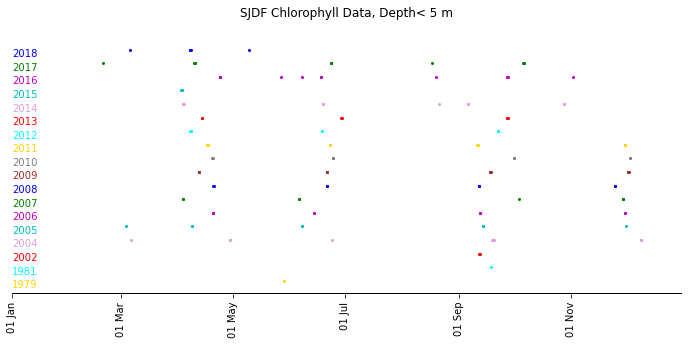

In [9]:
# plot matched data sampling times
dfi=dJDF.loc[(dJDF.Chlorophyll_Extracted>=0)&(dJDF.Z<5)]
yr0=int(1970)
clist=('gold','aqua','r','plum','c','m','g','b','brown','gray',
       'gold','aqua','r','plum','c','m','g','b','brown','gray')
fig,axL=plt.subplots(1,1,figsize=(12,5))
for ii, yr in enumerate(np.unique(dfi.Year)):
    datyr=dfi.loc[dfi.Year==yr]
    dshift=dt.datetime(yr0,1,1)-dt.datetime(yr,1,1)
    axL.plot(datyr.dtUTC+dshift,np.zeros(np.shape(datyr.dtUTC))+.1*ii,'.',
             color=clist[ii],markersize=4,label=str(yr))
    axL.annotate(str(yr), xy=(dt.datetime(yr0,1,1), 0.1*ii-.05),color=clist[ii])
axL.set_yticks(());
yearsFmt = mdates.DateFormatter('%d %b')
axL.xaxis.set_major_formatter(yearsFmt)
axL.xaxis.set_ticks([dt.datetime(yr0,1,1), dt.datetime(yr0,3,1),dt.datetime(yr0,5,1),dt.datetime(yr0,7,1),
                     dt.datetime(yr0,9,1),dt.datetime(yr0,11,1),dt.datetime(yr0+1,1,1)])
for tick in axL.get_xticklabels():
        tick.set_rotation(90)
        tick.set_horizontalalignment('center')
axL.set_ylim(-.1,.1*(len(np.unique(dfi.Year))+1))
axL.set_xlim(dt.datetime(yr0,1,1),dt.datetime(yr0,12,31))
#axL.legend()
axL.set_frame_on(False)
xmin, xmax = axL.get_xaxis().get_view_interval()
ymin, ymax = axL.get_yaxis().get_view_interval()
axL.add_artist(mpl.lines.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2));
axL.set_title('SJDF Chlorophyll Data, Depth< 5 m')

Text(0.5, 1.0, 'SJDF Chlorophyll Data, Depth > 30 m')

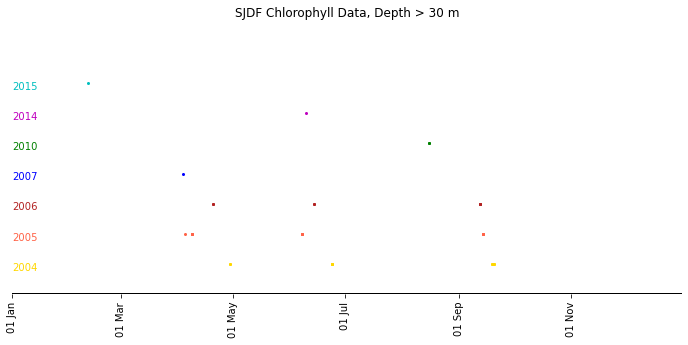

In [10]:
# plot matched data sampling times
dfi=dJDF.loc[(dJDF.Chlorophyll_Extracted>=0)&(dJDF.Z>30)]
yr0=int(1970)
clist=('gold','tomato','firebrick','b','g','m','c','plum','brown','gray',
       'gold','aqua','plum','c','m','r','g','b','brown','gray')
fig,axL=plt.subplots(1,1,figsize=(12,5))
for ii, yr in enumerate(np.unique(dfi.Year)):
    datyr=dfi.loc[dfi.Year==yr]
    dshift=dt.datetime(yr0,1,1)-dt.datetime(yr,1,1)
    axL.plot(datyr.dtUTC+dshift,np.zeros(np.shape(datyr.dtUTC))+.1*ii,'.',
             color=clist[ii],markersize=4,label=str(yr))
    axL.annotate(str(yr), xy=(dt.datetime(yr0,1,1), 0.1*ii-.02),color=clist[ii])
axL.set_yticks(());
yearsFmt = mdates.DateFormatter('%d %b')
axL.xaxis.set_major_formatter(yearsFmt)
axL.xaxis.set_ticks([dt.datetime(yr0,1,1), dt.datetime(yr0,3,1),dt.datetime(yr0,5,1),dt.datetime(yr0,7,1),
                     dt.datetime(yr0,9,1),dt.datetime(yr0,11,1),dt.datetime(yr0+1,1,1)])
for tick in axL.get_xticklabels():
        tick.set_rotation(90)
        tick.set_horizontalalignment('center')
axL.set_ylim(-.1,.1*(len(np.unique(dfi.Year))+1))
axL.set_xlim(dt.datetime(yr0,1,1),dt.datetime(yr0,12,31))
#axL.legend()
axL.set_frame_on(False)
xmin, xmax = axL.get_xaxis().get_view_interval()
ymin, ymax = axL.get_yaxis().get_view_interval()
axL.add_artist(mpl.lines.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2));
axL.set_title('SJDF Chlorophyll Data, Depth > 30 m')

### Available Nitrate Data

/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:123: UserWarning: No contour levels were found within the data range.
  contour_lines = axes.contour(


Text(0, 0.5, 'Number of \nMeasurements')

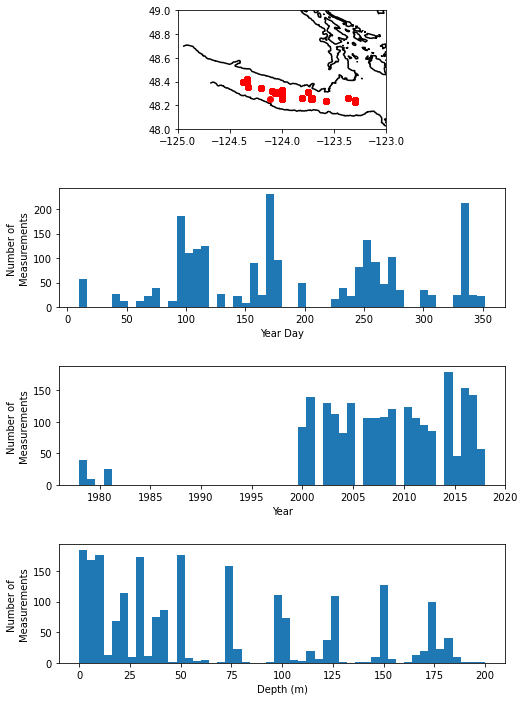

In [11]:
dfi=dJDF.loc[dJDF.N>=0]
fig,ax=plt.subplots(4,1,figsize=(8,12))
fig.subplots_adjust(hspace=0.5)
ax=ax.flatten()
viz_tools.plot_coastline(ax[0], grid, coords = 'map')
ax[0].plot(dfi.Lon,dfi.Lat,'ro',)
ax[0].set_xlim(-125,-123)
ax[0].set_ylim(48,49)
viz_tools.set_aspect(ax[0],coords='map')
ax[1].hist(dfi.YD,50)
ax[1].set_xlabel('Year Day')
ax[1].set_ylabel('Number of \nMeasurements')
ax[2].hist(dfi.Year,50)
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Number of \nMeasurements')
ax[3].hist(dfi.Z,50)
ax[3].set_xlabel('Depth (m)')
ax[3].set_ylabel('Number of \nMeasurements')

In [13]:
### check when CTD dataset starts:
df2=et.loadDFOCTD()
np.min(df2['Year'])

2014.0

In [14]:
grid.close()